# Hydrostatic Balance

Balance between vertical pressure gradient, $\partial p/\partial z$, and the gravitation force, $-\rho g$ where $\rho$ is the air density and $z$ is the heigh from the surface

in equation form this is :
$$ \frac{\partial p}{\partial z} = - \rho g $$

Combine this with the ideal gas law, which for the atmosphere is $p = \rho R-d T$, where $R_d$ is the gas 'constant' (287 J/kg/K) and $T is the temperature. The combaination of teh two yields:

$$ \frac{\partial p}{\partial z} = - \frac{p g}{R_d T}

We can use finite differences to approximate the derivative, where $\Delta p$ and $\Delta z$ represent differences in pressure and height between two locations

$$ \frac{\Delta p}{\Delta z} = - \frac{p g}{R_d T} $$

Solving for $\Delta z$ gives an eqation that allows for estimation of a change in height:

$$ \Delta z = -\frac{R_d T}{g} \frac{\Delta p}{p} $$

### Demonstration of hydrostatic balance with synthetic data

In [7]:
"""import libraries"""
import numpy as np
import matplotlib.pyplot as plt

#units: meters, kelvin, seconds

In [3]:
"""Create the pressure, temp, etc. variables"""

T = 288.15 #K (standard atmospheric temp)
Rd = 287 # J/kg/K gas constnat
g = 9.806 #9.8 ish m/s/s gravity
p = np.linspace(1, 100000, 1000) #Pa

#reverse P so top is first
p = p[ ::-1]

p.shape

(1000,)

Stride notaiton:

'p[start:end:stride]'

'p[::-1]' is equivalent to 'p[end:0:-1]'

In [4]:
#stride test
x = np.arange(10,21)
x[2:2:3]

# skips every 3rd value
#or something??

array([], dtype=int32)

In [5]:
"""Calculate height changes"""

#calculate changes in pressure
dp = np.diff(p)

# calculate avg p between pairs
p_avg = 0.5 * (p[1:] + p[:-1])

#calculate the changes in height
dz = -(Rd*T/g)*(dp/p_avg)

dz

array([8.44609997e+00, 8.45456715e+00, 8.46305133e+00, 8.47155255e+00,
       8.48007087e+00, 8.48860633e+00, 8.49715900e+00, 8.50572892e+00,
       8.51431614e+00, 8.52292072e+00, 8.53154270e+00, 8.54018215e+00,
       8.54883912e+00, 8.55751365e+00, 8.56620581e+00, 8.57491564e+00,
       8.58364320e+00, 8.59238854e+00, 8.60115173e+00, 8.60993280e+00,
       8.61873183e+00, 8.62754885e+00, 8.63638394e+00, 8.64523714e+00,
       8.65410851e+00, 8.66299810e+00, 8.67190598e+00, 8.68083219e+00,
       8.68977680e+00, 8.69873986e+00, 8.70772143e+00, 8.71672156e+00,
       8.72574032e+00, 8.73477777e+00, 8.74383395e+00, 8.75290893e+00,
       8.76200277e+00, 8.77111552e+00, 8.78024725e+00, 8.78939801e+00,
       8.79856786e+00, 8.80775687e+00, 8.81696509e+00, 8.82619259e+00,
       8.83543942e+00, 8.84470565e+00, 8.85399133e+00, 8.86329653e+00,
       8.87262131e+00, 8.88196573e+00, 8.89132986e+00, 8.90071375e+00,
       8.91011747e+00, 8.91954108e+00, 8.92898464e+00, 8.93844822e+00,
      

<function matplotlib.pyplot.show(close=None, block=None)>

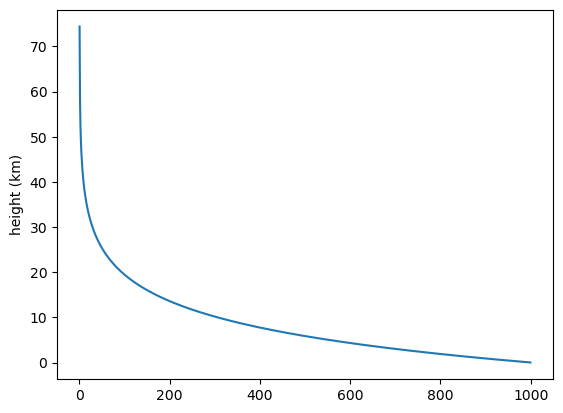

In [9]:
"""calcualte height as """

# do the integration
z = np.cumsum(dz)

#plot
fig, ax = plt.subplots()

p_hpa = p_avg /100
z_km = z /1e3
ax.plot(p_hpa, z_km)
ax.set_ylabel("height (km)")

plt.show